In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
%%writefile sample.csv
c1, c2, c3
1, 1.15, one
2, 2.23, two
3, 3.32, three

Overwriting sample.csv


In [65]:
df = pd.read_csv('sample.csv')
df

,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


In [66]:
file_path = './sample.csv'
df1 = pd.read_csv(file_path)
df1

,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


In [67]:
# 테이블 설명 제거
df2 = pd.read_csv(file_path, header=None)
df2

,0,1,2
0,c1,c2,c3
1,1,1.15,one
2,2,2.23,two
3,3,3.32,three


In [68]:
#
df3 = pd.read_csv(file_path, index_col='c1')
df3.index

Int64Index([1, 2, 3], dtype='int64', name='c1')

In [69]:
# excel 열기
# jupyter에서는 openpyxl 설치필요

df = pd.read_excel('남북한발전전력량.xlsx')
df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [70]:
# JSON 파일 읽기
df2 = pd.read_json('/content/read_json_sample.json')
df2.index
df2.columns

Index(['name', 'year', 'developer', 'opensource'], dtype='object')

In [71]:
# HTML 파일 읽기
# jupyter에서 lxml 설치 필요
df3 = pd.read_html('/content/sample.html')
print(type(df3))   # data frame이 아님
df3

<class 'list'>


[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

In [72]:
for i in range(len(df3)):
    print('df[%i]'%i)
    print(df3[i])
    print('\n')

df[0]
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


df[1]
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True




In [73]:
df5 = df3[1]     # html 자체 정보에 frame으로 되어 있음
print(type(df5))
df5.set_index(['name'],inplace=True)
df5

<class 'pandas.core.frame.DataFrame'>


,year,developer,opensource
name,,,
NumPy,2006,Travis Oliphant,True
matplotlib,2003,John D. Hunter,True
pandas,2008,Wes Mckinneye,True


In [79]:
# 데이터를 csv로 저장
dict_data = dict(c0=[1,2,3], c1=[4,5,6], c2=[7,8,9], c3=[10,11,12], c4=[13,14,15])
df = pd.DataFrame(dict_data)
ls = ['a', df]
print(ls)

['a',    c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15]


In [75]:
df.set_index('c0', inplace=True)
df

,c1,c2,c3,c4
c0,,,,
1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [76]:
df.to_csv('./df_sam.csv')

In [77]:
df.to_json('./df_sam.json')

In [78]:
df.to_excel('./df_sam.xlsx')

In [87]:
# excel 시트에 sheet1, sheet2, ... 에 저장

df1 = pd.DataFrame(dict(c0=[1,2,3], c1=[4,5,6], c2=[7,8,9], c3=[10,11,12], c4=[13,14,15]))
df1.set_index('c0',inplace=True)
#df1

df2 = pd.DataFrame([[15,'남','신촌중'],[17,'여','연세중']], 
                  index=['준서','예은'], columns=['나이', '성별', '학교'])
#df2

writer = pd.ExcelWriter('./df_excelwriter.xlsx')
df1.to_excel(writer, sheet_name='sheet1')
df2.to_excel(writer, sheet_name='sheet2')
writer.save()

In [94]:
# 실제 데이터 탐색 (탐색적 분석, exploratory_analysis) , head, info, describe
df = pd.read_csv('./auto-mpg.csv', header=None)   # header 없음
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']
print(df.head())
print(df.shape)
print(df.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    in

In [96]:
# 데이터프레임 기술통계 정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [98]:
# 데이터 프레임 df의 각 열이 가지고 있는 개수 확인
df.count(), type(df.count())

(mpg             398
 cylinders       398
 displacement    398
 horsepower      398
 weight          398
 acceleration    398
 model year      398
 origin          398
 name            398
 dtype: int64, pandas.core.series.Series)

In [100]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [105]:
# 평균값, 중앙값, 최소값, 최대값, 표준편차
df['mpg'].mean(), df['mpg'].median(), df.mpg.min(), df.mpg.max(), df.mpg.std()


(23.514572864321607, 23.0, 9.0, 46.6, 7.815984312565782)

In [106]:
# 상관관계
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [107]:
# 무게와 연비의 상관관계
df[['mpg','weight']].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


In [113]:
df = pd.read_excel('남북한발전전력량.xlsx')
df


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [111]:
df.describe()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,2,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
unique,2,5,8,8,8,8,8,8,8,8,...,8,8,8,8,8,9,9,9,9,9
top,남한,합계,-,-,-,-,-,-,-,-,...,-,-,-,-,-,5096,5171,5220,5281,5404
freq,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,1,1,1,1


In [119]:
# [남한, 북한], [1990~], 합계행 2개
df_e = df.iloc[[0,5],3:]
df_e.index = ['south','north']
df_e.columns = df_e.columns.map(int)  # 열이름을 정수형으로 변경
df_e

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
south,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
north,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


<AxesSubplot:>

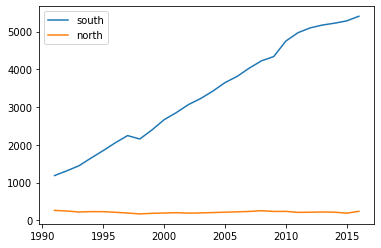

In [122]:
# 선 그래프 그리기
df_t = df_e.T
df_t.plot()

<AxesSubplot:>

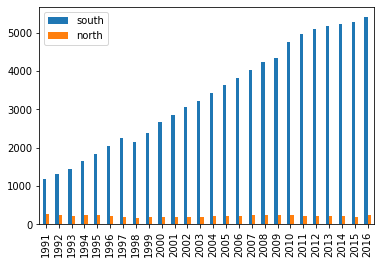

In [132]:
df_t.plot(kind='bar')